In [1]:
import importlib
import utilsHannes as utilsH

from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper

from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt
%matplotlib inline


In [68]:
importlib.reload(utilsH)

version = "v1.0-mini"
DATAROOT = "data/sets/nuscenes"
subset = "mini_train"
seconds_of_history_used = 2.0
mini_train = get_prediction_challenge_split('mini_train', dataroot=DATAROOT)
data_set = mini_train

# --------------------------------------------------------------------------
# Use get_and_format_data as a wrapping function:
img_list, img_tensor_list, agent_state_vector_list, future_xy_local_list = utilsH.get_and_format_data(version, DATAROOT, subset, seconds_of_history_used)

print(img_tensor_list[0])
print(agent_state_vector_list[0])
print(future_xy_local_list[0])



Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.681 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ...,  15.,  24., 255.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ...,   0.,   0., 255.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.

In [33]:
# importlib.reload(utilsH)

# version = "v1.0-mini"
# DATAROOT = "data/sets/nuscenes"
# subset = "mini_train"

# # --------------------------------------------------------------------------
# # Use the sub-functions directly:
# nuscenes = NuScenes('v1.0-mini', dataroot=DATAROOT)
# mini_train = get_prediction_challenge_split('mini_train', dataroot=DATAROOT)
# helper = PredictHelper(nuscenes)

# # # FOR SMALL TEST:
# # data_set = mini_train[:50]
# # else:
# data_set = mini_train

# seconds_of_history_used = 1.5

# instance_token_list, sample_token_list = utilsH.get_instance_tokens_and_sample_tokens(data_set)

# instance_token_list, sample_token_list = utilsH.remove_short_sequences(seconds_of_history_used, instance_token_list, sample_token_list)

# instance_token_list, sample_token_list = utilsH.extract_one_instance_per_sequence(seconds_of_history_used, instance_token_list, sample_token_list)

# img_list, agent_state_vector_list, future_xy_local_list = utilsH.get_data_and_ground_truth(nuscenes, helper, seconds_of_history_used, instance_token_list, sample_token_list)

# img_tensor_list = utilsH.create_img_tensor(img_list)

data_set at index 4: bc38961ca0ac4b14ab90e547ba79fbb6_f1e3d9d08f044c439ce86a2d6fcca57b
agent_state_vector at index 4: tensor([[9.0783, 0.6008, 0.0000]])
future_xy_local at index 4:
[[-0.29354777  3.34668937]
 [-0.42006699  8.70861233]
 [-0.5467473  13.82791425]
 [-0.75323613 18.61060422]
 [-0.94647532 23.12413727]
 [-1.0315138  27.55555696]
 [-1.32069127 31.75470037]
 [-1.67371225 35.29721603]
 [-1.97815124 37.85282298]
 [-2.43699988 40.6379025 ]
 [-2.90035247 42.74170035]
 [-3.48701218 45.07576619]]


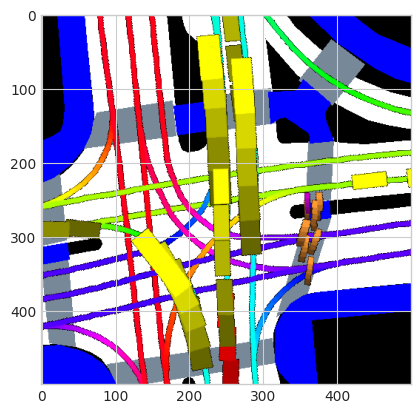

In [34]:
# Test objects for specific index

test_index = 4 #Den ser ut att bryta mellan 108 och 109 exempelvis

print(f"data_set at index {test_index}: {data_set[test_index]}")
# print(f"instance_token_list at index {test_index}: {instance_token_list[test_index]}")
# print(f"sample_token_list at index {test_index}: {sample_token_list[test_index]}")
plt.imshow(img_list[test_index])
print(f"agent_state_vector at index {test_index}: {agent_state_vector_list[test_index]}")
print(f"future_xy_local at index {test_index}:")# {future_xy_local_list[test_index]}")
print(future_xy_local_list[test_index])

In [35]:
importlib.reload(utilsH)

## Create video

# output_filename = 'test_output_video_2fps_dt2_50.avi'
output_filename = f'test_output_video_2fps_length_{len(img_list)}.avi'#Daniel
utilsH.create_video(img_list, output_filename, fps=2)

In [58]:
from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
from nuscenes.prediction.models.covernet import CoverNet
from nuscenes.prediction.models.covernet import ConstantLatticeLoss

import torch

backbone = ResNetBackbone('resnet50')
mtp = MTP(backbone, num_modes=2)

# Note that the value of num_modes depends on the size of the lattice used for CoverNet.
covernet = CoverNet(backbone, num_modes=64)

In [43]:
test_index = 45

logits = covernet(img_tensor_list[test_index], agent_state_vector_list[test_index])

sofmaxy = torch.nn.Softmax(dim=1)
outputy = sofmaxy(logits)
print(torch.sum(outputy).item())
print(outputy.detach())

1.0000001192092896
tensor([[0.0079, 0.0141, 0.0204, 0.0124, 0.0078, 0.0207, 0.0136, 0.0239, 0.0241,
         0.0127, 0.0165, 0.0078, 0.0137, 0.0126, 0.0107, 0.0261, 0.0137, 0.0179,
         0.0138, 0.0076, 0.0107, 0.0190, 0.0218, 0.0244, 0.0149, 0.0104, 0.0233,
         0.0232, 0.0170, 0.0170, 0.0084, 0.0110, 0.0107, 0.0145, 0.0220, 0.0155,
         0.0110, 0.0112, 0.0203, 0.0136, 0.0131, 0.0089, 0.0177, 0.0143, 0.0148,
         0.0183, 0.0236, 0.0155, 0.0132, 0.0205, 0.0162, 0.0133, 0.0159, 0.0143,
         0.0171, 0.0121, 0.0196, 0.0117, 0.0118, 0.0155, 0.0225, 0.0157, 0.0147,
         0.0217]])


In [49]:
import pickle

#Epsilon is the amount of coverage in the set, 
#i.e. a real world trajectory is at most 8 meters from a trajectory in this set
#We released the set for epsilon = 2, 4, 8. Consult the paper for more information
#on how this set was created

#PATH_TO_EPSILON_8_SET = "/data/sets/nuscenes-prediction-challenge-trajectory-sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
PATH_TO_EPSILON_8_SET = "data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
trajectories = pickle.load(open(PATH_TO_EPSILON_8_SET, 'rb'))

#Saved them as a list of lists
trajectories = torch.Tensor(trajectories)

# Hannes kommenterar bort
#Print 5 most likely predictions
# print(trajectories[logits.argsort(descending=True)[:1]])



# Hannes 
newTraj = trajectories[logits.argsort(descending=True)[:1]]
print(newTraj)

tensor([[[[-7.9530e-02,  2.8561e+00],
          [-2.9207e-01,  6.2787e+00],
          [-7.1361e-01,  9.9703e+00],
          ...,
          [-1.1679e+01,  3.7378e+01],
          [-1.4354e+01,  4.0899e+01],
          [-1.7089e+01,  4.4090e+01]],

         [[-2.8011e-01,  3.3396e+00],
          [-8.5391e-01,  6.6029e+00],
          [-1.7871e+00,  9.8274e+00],
          ...,
          [-2.4038e+01,  3.4449e+01],
          [-2.8810e+01,  3.8055e+01],
          [-3.3998e+01,  4.1688e+01]],

         [[ 4.6056e-02,  3.6988e+00],
          [ 3.4553e-01,  6.9963e+00],
          [ 8.5752e-01,  1.0285e+01],
          ...,
          [ 1.0942e+01,  2.8339e+01],
          [ 1.3190e+01,  3.0253e+01],
          [ 1.5600e+01,  3.1961e+01]],

         ...,

         [[-2.4342e-02,  6.0260e+00],
          [-1.0404e-01,  1.1295e+01],
          [-9.2170e-02,  1.7083e+01],
          ...,
          [ 3.6829e-01,  5.7070e+01],
          [ 2.6024e-01,  6.3046e+01],
          [ 7.5568e-02,  6.9022e+01]],

     

Shape of set of all trajectories = (415, 12, 2)


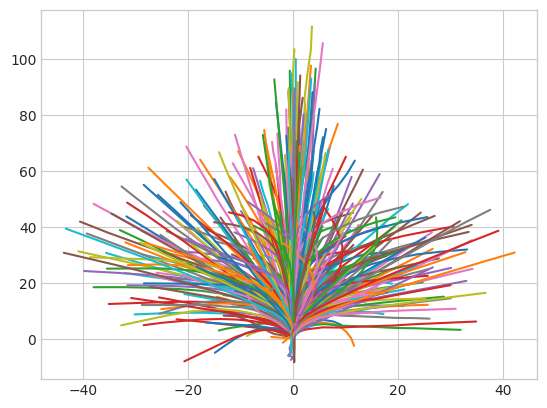

predictedProbabilities = [0.00931747 0.00944954 0.0096693  0.01014677 0.01032267 0.01057531
 0.0106461  0.01088098 0.01100943 0.01112408 0.01148139 0.01174014
 0.01177004 0.01240471 0.01243121 0.01249673 0.01259382 0.01270576
 0.01283102 0.01285155 0.01314712 0.01316077 0.01322565 0.0135542
 0.01401171 0.01406096 0.01420978 0.01431728 0.01439637 0.01448714
 0.01459655 0.01467965 0.01495769 0.01509692 0.01514055 0.01525707
 0.01545654 0.01592118 0.01639193 0.01678779 0.01682646 0.0170579
 0.01738546 0.01761117 0.01779276 0.01812068 0.01826003 0.01847661
 0.01857772 0.01889571 0.01905764 0.0191995  0.01920553 0.01926187
 0.01937864 0.01940564 0.0197262  0.02041463 0.02241084 0.02305539
 0.02375419 0.02375472 0.02535749 0.02770836]
predictedProbabilitiesIndices = [11  5 31 30 24 13 15 34 35 27 49 46 23 45 43 16 48 19 50 37  8 36 25  2
 61 14  7 47 22  6  0 28 12 20 39 32 21 52 29 40  9 63 59 41 60 38 18 62
 54 44 26 17  1 58 33 56 57  4 42 51 55  3 53 10]
topProbabilitiesIndices = [10 53 

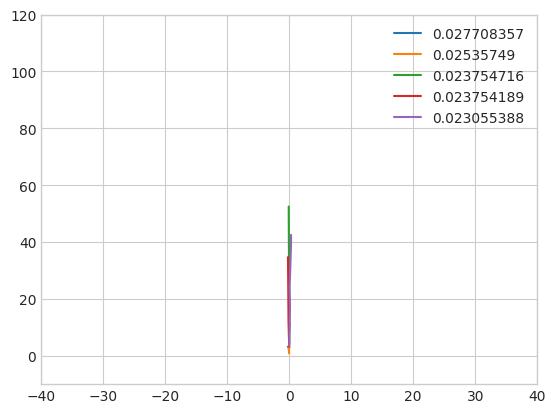

In [65]:
# Hannes cell
import numpy as np

### Choose which trajectory sets to use 
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_2.pkl', 'rb') as f:
#     data = pickle.load(f)
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_4.pkl', 'rb') as f:
    data = pickle.load(f)
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl', 'rb') as f:
#     data = pickle.load(f)

allTrajectories = np.array(data)
print(f"Shape of set of all trajectories = {allTrajectories.shape}")

### Plot all trajectories
modes = np.arange(allTrajectories.shape[0])
timesteps = np.arange(12) # 12 timesteps (which is maximum), can be reduced
for mode in modes:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.show()


### Plot selected trajectories
numbersOfDisplayedProbabilities = 5
# topPredictedTrajectories = allTrajectories[logits.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions
topPredictedTrajectories = allTrajectories[outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions

# print(allTrajectories)
# print(f"outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities] = {outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]}")
# print(topPredictedTrajectories)
# predictedProbabilities = outputy[0][outputy.argsort(descending=True)[0][:5]]

# tmpOutputy = outputy.detach().clone()
# print(tmpOutputy)
# predictedProbabilities = []
# for topPrediction in range(numbersOfDisplayedProbabilities):
#     predictedProbabilitiesIndex = [tmpOutputy.argmax()]
#     print(predictedProbabilitiesIndex)
#     tmpOutputy[0][predictedProbabilitiesIndex] = 0
#     predictedProbabilities.append(predictedProbabilitiesIndex)

## TO GET INDICES
outputyValues = outputy.detach().numpy().squeeze()
predictedProbabilitiesIndices = np.argsort(outputyValues)
predictedProbabilities = outputyValues[predictedProbabilitiesIndices]
# topProbabilitiesIndices = predictedProbabilities[0][::-1][0:numbersOfDisplayedProbabilities]
topProbabilitiesIndices = predictedProbabilitiesIndices[::-1][0:numbersOfDisplayedProbabilities]
# predictedProbabilities = outputy.argsort(descending=True)
# topProbabilities = predictedProbabilities[0][0:5]
# topProbabilities = topProbabilitiesIndices

# print(outputyValues)
## TO GET VALUES 
topProbabilities = []
for index in topProbabilitiesIndices:
    topProbabilities.append(outputyValues[index])


# print(f"outputy = {outputy}")
print(f"predictedProbabilities = {predictedProbabilities}")
print(f"predictedProbabilitiesIndices = {predictedProbabilitiesIndices}")
print(f"topProbabilitiesIndices = {topProbabilitiesIndices}")
print(f"topProbabilities = {topProbabilities}")
print(f"Shape of top predicted trajectories = {topPredictedTrajectories.shape}")
modes2 = np.arange(topPredictedTrajectories.shape[0])
# timesteps = np.arange(12)
for mode in modes2:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.ylim([-10,120])
plt.xlim([-40,40])
# plt.legend(["1th prediction", "2nd prediction", "3rd prediction", "4th prediction", "5th prediction"])
plt.legend(topProbabilities)
plt.show()


# Test line for pushing, again


In [60]:
# GPT with covernet input

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
from nuscenes.prediction.models.covernet import CoverNet
from nuscenes.prediction.models.covernet import ConstantLatticeLoss
from nuscenes.prediction.models.covernet import mean_pointwise_l2_distance

importlib.reload(utilsH)

version = "v1.0-trainval" #Or v1.0-mini
DATAROOT = "data/sets/nuscenes"
subset = "train" #One of 'mini_train', 'mini_val', 'train', 'val'.
seconds_of_history_used = 2.0

# --------------------------------------------------------------------------
# Use get_and_format_data as a wrapping function:
img_list, img_tensor_list, agent_state_vector_list, future_xy_local_list = utilsH.get_and_format_data(version, DATAROOT, subset, seconds_of_history_used)

#################################################################################################################################
# Define your custom dataset class that inherits from torch.utils.data.Dataset
class NuscenesDataset(Dataset):
    def __init__(self, image_data, agent_state_data, ground_truth_data):
        self.image_data = image_data
        self.agent_state_data = agent_state_data
        self.ground_truth_data = ground_truth_data
        
    def __len__(self):
        return len(self.image_data)
    
    def __getitem__(self, index):
        image_data_item = self.image_data[index]
        agent_state_data_item = self.agent_state_data[index]
        ground_truth_data_item = self.ground_truth_data[index]
        
        return image_data_item, agent_state_data_item, ground_truth_data_item

#################################################################################################################################


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 213.635 seconds.
Reverse indexing ...
Done reverse indexing in 14.3 seconds.


In [1]:
# Prints
num_datapoints = len(img_tensor_list)
print(f"num_datapoints = {num_datapoints}")
print(f"img_tensor_list = {img_tensor_list[0].size()}")
print(f"agent_state_vector_list = {agent_state_vector_list[0]}")
print(f"future_xy_local_list = {future_xy_local_list[0][0]}")

# For testing
short_size = 30
short_img_tensor_list = img_tensor_list[:short_size]
short_agent_state_vector_list = agent_state_vector_list[:short_size]
short_future_xy_local_list = future_xy_local_list[:short_size]

# Prints
num_datapoints = len(short_img_tensor_list)
print(f"short_num_datapoints = {num_datapoints}")

# Define your dataset
dataset = NuscenesDataset(img_tensor_list, agent_state_vector_list, future_xy_local_list)
shortDataset = NuscenesDataset(short_img_tensor_list, short_agent_state_vector_list, short_future_xy_local_list)

# Instantiate your dataloader
batch_size = 1 # 32
shuffle = True # Set to True if you want to shuffle the data
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
shortDataloader = DataLoader(shortDataset, batch_size=batch_size, shuffle=shuffle)

# Initialize the CoverNet model
backbone = ResNetBackbone('resnet50') 
num_modes = 2206 # 2206, 415, 64
covernet = CoverNet(backbone, num_modes)

# Lattice and similarity function
traj_epsilon = 2
with open(f'data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_{traj_epsilon}.pkl', 'rb') as f:
    latticeData = pickle.load(f)
lattice = np.array(latticeData) # a numpy array of shape [num_modes, n_timesteps, state_dim]
print(f"latticeSize = {lattice}")
similarity_function = mean_pointwise_l2_distance  # You can also define your own similarity function

# Define your loss function and optimizer
loss_function = ConstantLatticeLoss(lattice, similarity_function)
lr = 1e-4 # From Covernet paper: fixed learning rate of 1e−4
optimizer = optim.Adam(covernet.parameters(), lr=lr)  # Replace <YOUR_LEARNING_RATE> with your desired learning rate

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
covernet.to(device)

# Training loop
num_epochs = 50  # Replace <YOUR_NUM_EPOCHS> with the number of epochs you want to train for
for epoch in range(num_epochs):
    epochLoss = 0
    for batchCount, batch in enumerate(shortDataloader):

        # Get batch data
        image_tensor, agent_state_vector, ground_truth_trajectory = batch
        image_tensor = image_tensor.to(device)
        agent_state_vector = agent_state_vector.to(device)
        ground_truth_trajectory = ground_truth_trajectory.to(device)

        # print(f"image_tensor before squeeze = {image_tensor.size()}")
        image_tensor = torch.squeeze(image_tensor, dim=1)
        # print(f"image_tensor after squeeze = {image_tensor.size()}")

        # print(f"agent_state_vector before squeeze = {agent_state_vector.size()}")
        agent_state_vector = torch.squeeze(agent_state_vector, dim=1)
        # print(f"agent_state_vector after squeeze = {agent_state_vector.size()}")
        
        # print(f"ground_truth_trajectory before squeeze = {ground_truth_trajectory.size()}")
        # ground_truth_trajectory = torch.squeeze(ground_truth_trajectory, dim=1)
        # print(f"ground_truth_trajectory after squeeze = {ground_truth_trajectory.size()}")


        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        logits = covernet(image_tensor, agent_state_vector)

        # Compute loss
        loss = loss_function(logits, ground_truth_trajectory)

        # Backward pass
        loss.backward()
        optimizer.step()
        epochLoss += loss.item()



        # Print loss for this batch
        print(f"Batch [{batchCount+1}/{int(num_datapoints/batch_size)+1}], Batch Loss: {loss.item():.4f}")
     
    # Print loss for this batch
    print(f"Epoch [{epoch+1}/{num_epochs}], Epoch Loss: {epochLoss:.4f}")


    # Optionally, you can evaluate the model after each epoch
    # by running inference on a validation set and computing relevant metrics

# Training complete
print("Training complete!")


NameError: name 'img_tensor_list' is not defined

In [33]:
# Test utilsHannes.py functions

import importlib
import utilsHannes as utilsH
importlib.reload(utilsH)

try:
    utilsH.test_utilsH_functions()
    print("All tests passed!")
except AssertionError as e:
    print(f"Error: {e}")

All tests passed!
